In [2]:
import pandas as pd
import numpy as np

In [3]:
stock = pd.read_csv('merged_stock_real_clean_1970.csv')
stock.drop(columns=['Unnamed: 0'], inplace=True)
stock.dtypes

ticker        object
open         float64
close        float64
adj_close    float64
low          float64
high         float64
volume         int64
date          object
exchange      object
name          object
sector        object
industry      object
dtype: object

In [4]:
stock = stock.loc[(stock.sector != 'OTHERS') & (stock.sector != 'MISCELLANEOUS')]

In [9]:
low = stock.loc[(stock.adj_close < 17)]
low

,ticker,open,close,adj_close,low,high,volume,date,exchange,name,sector,industry
date,,,,,,,,,,,,
2013-05-08,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
2013-05-09,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
2013-05-10,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
2013-05-13,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
2013-05-14,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-20,RMCF,10.25,10.10,10.100000,10.07,10.31,22300,2018-08-20,NASDAQ,"ROCKY MOUNTAIN CHOCOLATE FACTORY, INC.",CONSUMER NON-DURABLES,SPECIALTY FOODS
2018-08-21,RMCF,10.23,10.20,10.200000,10.10,10.27,10800,2018-08-21,NASDAQ,"ROCKY MOUNTAIN CHOCOLATE FACTORY, INC.",CONSUMER NON-DURABLES,SPECIALTY FOODS
2018-08-22,RMCF,10.29,10.19,10.190000,10.16,10.31,4700,2018-08-22,NASDAQ,"ROCKY MOUNTAIN CHOCOLATE FACTORY, INC.",CONSUMER NON-DURABLES,SPECIALTY FOODS


In [5]:
stock.date = pd.to_datetime(stock.date)
stock.dtypes
stock.index = pd.DatetimeIndex(stock.date, freq='infer')
stock

,ticker,open,close,adj_close,low,high,volume,date,exchange,name,sector,industry
date,,,,,,,,,,,,
2013-05-08,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
2013-05-09,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
2013-05-10,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
2013-05-13,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
2013-05-14,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-20,RMCF,10.25,10.10,10.100000,10.07,10.31,22300,2018-08-20,NASDAQ,"ROCKY MOUNTAIN CHOCOLATE FACTORY, INC.",CONSUMER NON-DURABLES,SPECIALTY FOODS
2018-08-21,RMCF,10.23,10.20,10.200000,10.10,10.27,10800,2018-08-21,NASDAQ,"ROCKY MOUNTAIN CHOCOLATE FACTORY, INC.",CONSUMER NON-DURABLES,SPECIALTY FOODS
2018-08-22,RMCF,10.29,10.19,10.190000,10.16,10.31,4700,2018-08-22,NASDAQ,"ROCKY MOUNTAIN CHOCOLATE FACTORY, INC.",CONSUMER NON-DURABLES,SPECIALTY FOODS


In [6]:
stock.isnull().sum()
stock = stock.dropna()
stock.isnull().sum()
stock.dtypes

ticker               object
open                float64
close               float64
adj_close           float64
low                 float64
high                float64
volume                int64
date         datetime64[ns]
exchange             object
name                 object
sector               object
industry             object
dtype: object

/Users/michelle/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


mean : 173210336484414.97


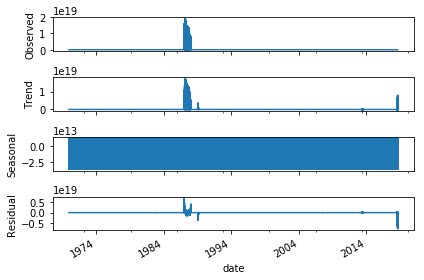

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

print('mean :' , stock.adj_close.mean())
res = sm.tsa.seasonal_decompose(stock.adj_close, freq=1)
resplot = res.plot()

mean : 6.763999249230005


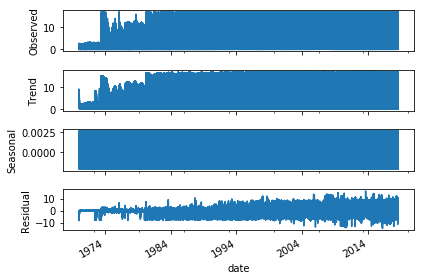

In [11]:
print('mean :' , low.adj_close.mean())
res = sm.tsa.seasonal_decompose(low.adj_close, freq=60)
resplot = res.plot()

mean of the Finance Industry : 74.32552677549556


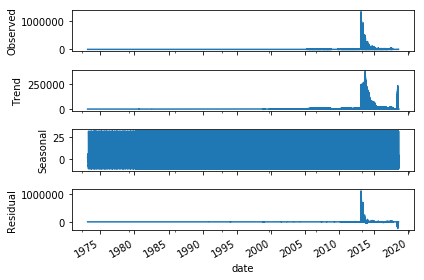

In [13]:
# find trend by industry
# not usable untill outliers are better arranged

FINANCE = stock.loc[stock.sector == 'FINANCE']
FINANCE

print('mean of the Finance Industry :' , FINANCE.close.mean())
res = sm.tsa.seasonal_decompose(FINANCE.close, freq=60)
resplot = res.plot()

mean of the Consumer Services Industry : 43.22415672113851


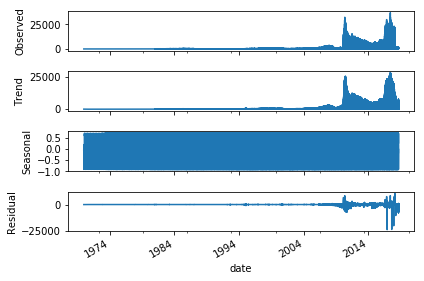

In [14]:
SERVICES = stock.loc[stock.sector == 'CONSUMER SERVICES']
SERVICES

print('mean of the Consumer Services Industry :' , SERVICES.close.mean())
res = sm.tsa.seasonal_decompose(SERVICES.close, freq=60)
resplot = res.plot()

mean of the Tech Industry : 46.34728705562109


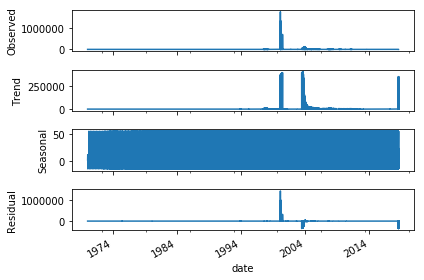

In [17]:
TECH = stock.loc[stock.sector == 'TECHNOLOGY']
TECH

print('mean of the Tech Industry :' , TECH.close.mean())
res = sm.tsa.seasonal_decompose(TECH.close, freq=60)
resplot = res.plot()

mean of the Public Utilities Industry : 30.508614288146227


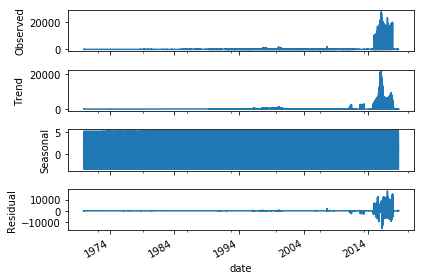

In [18]:
UTILITIES = stock.loc[stock.sector == 'PUBLIC UTILITIES']
UTILITIES

print('mean of the Public Utilities Industry :' , UTILITIES.close.mean())
res = sm.tsa.seasonal_decompose(UTILITIES.close, freq=60)
resplot = res.plot()

mean of the Capital Goods Industry : 24.915274464503934


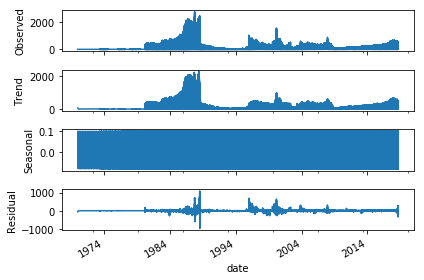

In [19]:
GOODS = stock.loc[stock.sector == 'CAPITAL GOODS']
GOODS

print('mean of the Capital Goods Industry :' , GOODS.close.mean())
res = sm.tsa.seasonal_decompose(GOODS.close, freq=60)
resplot = res.plot()

mean of the Basic Industries Industry : 29.767829428501816


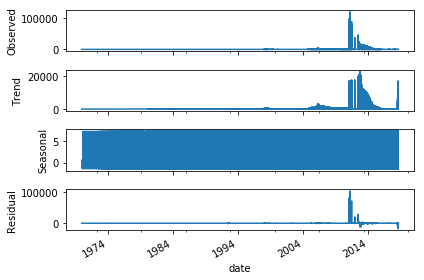

In [21]:
BASIC = stock.loc[stock.sector == 'BASIC INDUSTRIES']
BASIC

print('mean of the Basic Industries Industry :' , BASIC.close.mean())
res = sm.tsa.seasonal_decompose(BASIC.close, freq=60)
resplot = res.plot()

mean of the Health Care Industry : 137.88828368210434


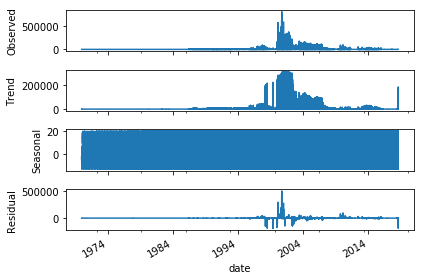

In [22]:
HEALTH = stock.loc[stock.sector == 'HEALTH CARE']
HEALTH

print('mean of the Health Care Industry :' , HEALTH.close.mean())
res = sm.tsa.seasonal_decompose(HEALTH.close, freq=60)
resplot = res.plot()

mean of the Consumer Durables Industry : 23.5019869996711


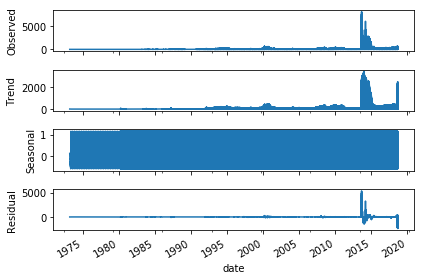

In [23]:
DURABLES = stock.loc[stock.sector == 'CONSUMER DURABLES']
DURABLES

print('mean of the Consumer Durables Industry :' , DURABLES.close.mean())
res = sm.tsa.seasonal_decompose(DURABLES.close, freq=60)
resplot = res.plot()

mean of the Energy Industry : 112.69170514187114


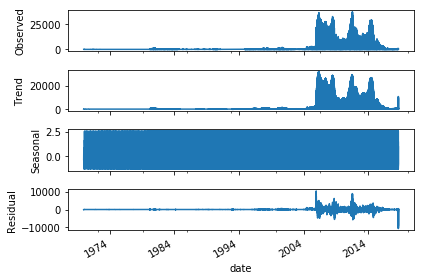

In [25]:
ENERGY = stock.loc[stock.sector == 'ENERGY']
ENERGY

print('mean of the Energy Industry :' , ENERGY.close.mean())
res = sm.tsa.seasonal_decompose(ENERGY.close, freq=60)
resplot = res.plot()

mean of the Transportation Industry: 1461.0779113216674


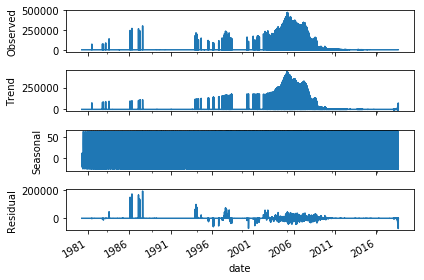

In [27]:
TRANSPORTATION = stock.loc[stock.sector == 'TRANSPORTATION']
TRANSPORTATION

print('mean of the Transportation Industry:' , TRANSPORTATION.close.mean())
res = sm.tsa.seasonal_decompose(TRANSPORTATION.close, freq=60)
resplot = res.plot()

mean of the Transportation Industry: 24.95192232737754


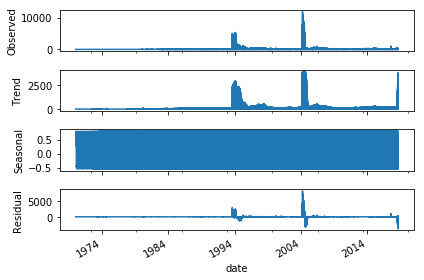

In [28]:
NONDURABLES = stock.loc[stock.sector == 'CONSUMER NON-DURABLES']
NONDURABLES

print('mean of the Transportation Industry:' , NONDURABLES.close.mean())
res = sm.tsa.seasonal_decompose(NONDURABLES.close, freq=60)
resplot = res.plot()